# Simple Linear Regression

#### Using Gradient Descent

Estimated slope: [[2.85674207]]
Estimated intercept: 7.007427466191913


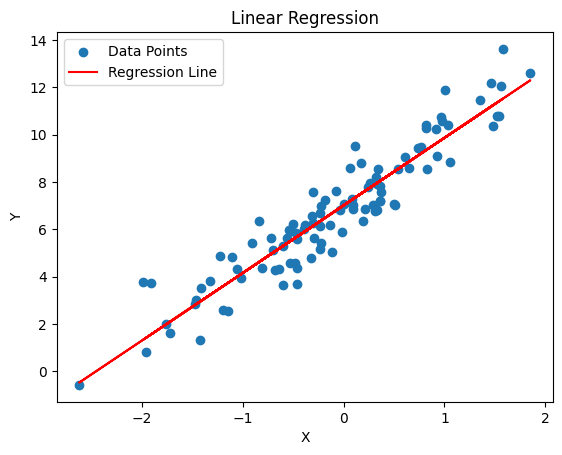

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Generating Data Points
np.random.seed(42)
x = np.random.randn(100,1)
y = 7 + 3*x + np.random.randn(100,1)

## Initial slope and intercept
m, b = np.zeros((1,1)), 0.0
learning_rate = 0.01
n_iterations = 1000
n_samples = len(x)
factor = -2/n_samples
error_history = []

for iter in range(n_iterations):
  y_pred = m * x + b
  error = y - y_pred
  error_history.append(np.mean(error))
  m -= learning_rate * factor * np.dot(x.T, error).flatten()
  b -= learning_rate * factor * np.sum(error)

print(f'Estimated slope: {m}')
print(f'Estimated intercept: {b}')
plt.scatter(x,y, label = 'Data Points')
plt.plot(x, x * m + b , color = 'r', label = 'Regression Line')

## Printing the Results
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()


Text(0.5, 1.0, 'Error History')

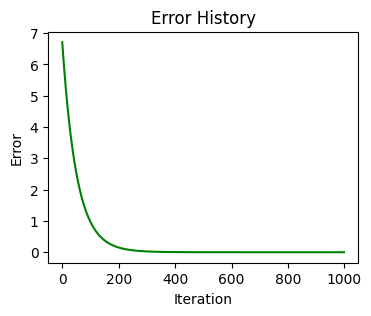

In [ ]:
## Printing the cost vs iteration graph
plt.figure(figsize = (4,3))
plt.plot(error_history, color = 'green')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error History')

#### Using OLS(ordinary least square)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Estimated slope: 3.1008697534021734
Estimated intercept: 7.089980744101754


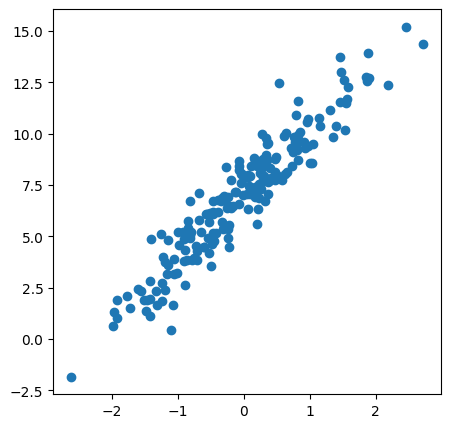

In [ ]:
## Generating Data Points
np.random.seed(42)
x = np.random.randn(200,1)
y = 7 + 3*x + np.random.randn(200,1)
plt.figure(figsize = (5,5))
plt.scatter(x, y)
mean_x, mean_y = np.mean(x), np.mean(y)
slope = (np.sum((x- mean_x)*(y-mean_y)))/(np.sum(np.square(x-mean_x)))
intercept = mean_y - slope * mean_x
print(f'Estimated slope: {slope}')
print(f'Estimated intercept: {intercept}')

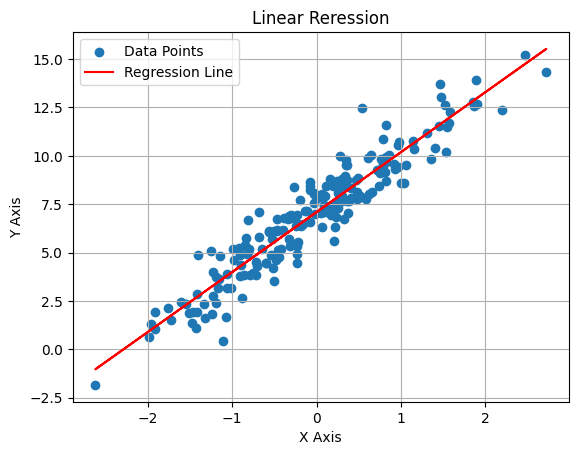

In [ ]:
## Plot the results
plt.scatter(x,y, label = 'Data Points')
plt.plot(x, x * slope + intercept, color = 'red', label = 'Regression Line')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.grid(True)
plt.title('Linear Reression')
plt.legend()

# Multiple Linear Regression

#### Using Gradient Descent

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class MultipleLinearRegression:
  def __init__(self):
    self.weights = None
    self.bias = None

  def fit(self, x, y, learning_rate, n_iterations):
    n_samples, n_features = x.shape
    self.weights = np.random.randn(n_features)
    self.bias = 0
    self.cost_history = []
    for i in range(n_iterations):
      y_pred = np.dot(x, self.weights) + self.bias
      dw = (1/n_samples) * np.dot(x.T, (y_pred - y))
      db = (1/n_samples) * np.sum(y_pred - y)
      self.weights -= learning_rate * dw
      self.bias -= learning_rate * db
      cost = self._compute_cost(x, y)
      self.cost_history.append(cost)

    return self

  def _compute_cost(self, x, y):
    n_samples = x.shape[0]
    y_pred = self.predict(x)
    cost = (1/2*n_samples) * np.sum((y_pred - y)**2)
    return cost

  def predict(self, x):
    return np.dot(x, self.weights) + self.bias

  def score(self, x, y):
    ssr = np.sum(np.square(y - self.predict(x)))
    sst = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ssr / sst)
    return r2

  def plot_cost_history(self):
    plt.figure(figsize=(4,4))
    plt.plot(range(len(self.cost_history)), self.cost_history)
    plt.title('Cost History')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

Estimated Weights: [ 0.49998801  2.51188145 -1.00174788]
Estimated Bias: 3.992833451632271
R^2 Score: 0.9990530156067016


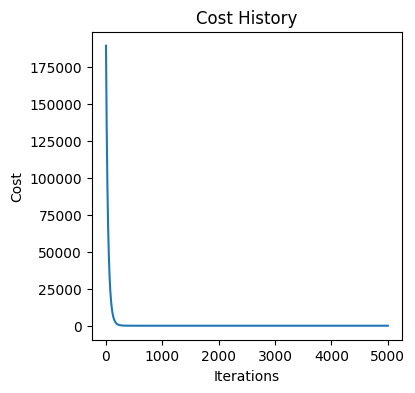

In [ ]:
def generate_sample_data(n_samples = 100, n_features = 3, noise = 0.1):
  x = np.random.randn(n_samples, n_features)
  true_weights = np.array([0.5, 2.5, -1.0])
  true_bias = 4.0
  y = np.dot(x, true_weights) + true_bias + np.random.randn(n_samples) * noise

  return x, y, true_weights, true_bias

def main():
  x, y , true_weights, true_bias = generate_sample_data()
  model = MultipleLinearRegression()
  model.fit(x, y, learning_rate = 0.01, n_iterations = 5000)
  r2 = model.score(x,y)

  print(f'Estimated Weights: {model.weights}')
  print(f'Estimated Bias: {model.bias}')
  print(f'R^2 Score: {r2}')

  model.plot_cost_history()

if __name__ == '__main__':
  main()

#### Using OLS method

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class MultipleLinearRegression:

    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.coefficients = None
        self.intercept = None

    def _add_intercept(self, X):
        """Add a column of ones to X if fit_intercept is True."""
        if self.fit_intercept:
            return np.column_stack((np.ones(X.shape[0]), X))
        return X

    def fit(self, X, y):
        """
        Fit the linear model using OLS formula: β = (X^T X)^(-1) X^T y
        """
        # Convert inputs to numpy arrays
        X, y = np.array(X), np.array(y)

        # Add intercept column if needed
        X_with_intercept = self._add_intercept(X)

        # Calculate coefficients using the OLS formula
        XTX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)
        beta = XTX_inv @ X_with_intercept.T @ y

        # Extract intercept and coefficients
        if self.fit_intercept:
            self.intercept = beta[0]
            self.coefficients = beta[1:]
        else:
            self.intercept = 0
            self.coefficients = beta

        return self

    ## Predict using the linear model.
    def predict(self, X):
        X = np.array(X)
        return X @ self.coefficients + self.intercept

    ## Calculate R² score (coefficient of determination).
    def score(self, X, y):
        y_pred = self.predict(X)
        y_mean = np.mean(y)

        # Total sum of squares and residual sum of squares
        ss_total = np.sum((y - y_mean) ** 2)
        ss_residual = np.sum((y - y_pred) ** 2)

        return 1 - (ss_residual / ss_total)

    ## Calculate statistics for the model.
    def get_stats(self, X, y):
        X, y = np.array(X), np.array(y)
        n_samples, n_features = X.shape

        y_pred = self.predict(X)
        residuals = y - y_pred

        # Degrees of freedom and MSE
        dof = n_samples - n_features - (1 if self.fit_intercept else 0)
        mse = np.sum(residuals ** 2) / dof

        # Calculate standard errors
        X_with_intercept = self._add_intercept(X)
        var_covar_matrix = mse * np.linalg.inv(X_with_intercept.T @ X_with_intercept)
        std_errors = np.sqrt(np.diag(var_covar_matrix))

        # Calculate t-values and p-values
        params = np.concatenate(([self.intercept], self.coefficients)) if self.fit_intercept else self.coefficients
        t_values = params / std_errors

        # Simple approximation for p-values using standard normal distribution
        p_values = 2 * (1 - np.abs(np.minimum(0.9999, np.maximum(0.0001, t_values / np.sqrt(dof)))))

        # R² and adjusted R²
        r2 = self.score(X, y)
        adj_r2 = 1 - (1 - r2) * (n_samples - 1) / dof

        return {
            'r2': r2,
            'adj_r2': adj_r2,
            'std_errors': std_errors,
            't_values': t_values,
            'p_values': p_values,
            'mse': mse
        }

    def summary(self, X, y, feature_names=None):
        """Print a summary of the regression results."""
        # Get feature names or generate defaults
        if feature_names is None:
            feature_names = [f"X{i+1}" for i in range(X.shape[1])]

        # Calculate all statistics
        stats = self.get_stats(X, y)

        # Print results in a clean format
        print("=" * 60)
        print("Multiple Linear Regression Results")
        print("=" * 60)
        print(f"R²: {stats['r2']:.4f}")
        print(f"Adjusted R²: {stats['adj_r2']:.4f}")
        print(f"MSE: {stats['mse']:.4f}")
        print("=" * 60)
        print(f"{'Variable':<15} {'Coefficient':<15} {'Std Error':<15} {'t-value':<15} {'p-value':<15}")
        print("-" * 75)

        # Print intercept if it exists
        if self.fit_intercept:
            print(f"{'Intercept':<15} {self.intercept:<15.4f} {stats['std_errors'][0]:<15.4f} "
                  f"{stats['t_values'][0]:<15.4f} {stats['p_values'][0]:<15.4f}")

            # Print each feature coefficient
            for i, name in enumerate(feature_names):
                print(f"{name:<15} {self.coefficients[i]:<15.4f} {stats['std_errors'][i+1]:<15.4f} "
                      f"{stats['t_values'][i+1]:<15.4f} {stats['p_values'][i+1]:<15.4f}")
        else:
            # Print each feature coefficient (no intercept)
            for i, name in enumerate(feature_names):
                print(f"{name:<15} {self.coefficients[i]:<15.4f} {stats['std_errors'][i]:<15.4f} "
                      f"{stats['t_values'][i]:<15.4f} {stats['p_values'][i]:<15.4f}")

        print("=" * 60)

In [6]:
def generate_sample_data(n_samples=100, n_features=3, noise=0.5, random_seed=42):
    """Generate sample data for testing."""
    np.random.seed(random_seed)

    # Generate random feature data
    X = np.random.randn(n_samples, n_features)

    # Generate true coefficients and intercept
    true_coefficients = np.random.randn(n_features)
    true_intercept = np.random.randn()

    # Generate target values with noise
    y = true_intercept + X @ true_coefficients + noise * np.random.randn(n_samples)

    return X, y, true_coefficients, true_intercept

True parameters:
Intercept: 0.6104
Coefficients: [-0.82899501 -0.56018104  0.74729361]

Estimated parameters:
Intercept: 0.6498
Coefficients: [-0.84355302 -0.57459682  0.77612169]
Multiple Linear Regression Results
R²: 0.8999
Adjusted R²: 0.8968
MSE: 0.2035
Variable        Coefficient     Std Error       t-value         p-value        
---------------------------------------------------------------------------
Intercept       0.6498          0.0462          14.0615         0.0002         
Feature 1       -0.8436         0.0555          -15.2023        1.9998         
Feature 2       -0.5746         0.0468          -12.2878        1.9998         
Feature 3       0.7761          0.0414          18.7500         0.0002         


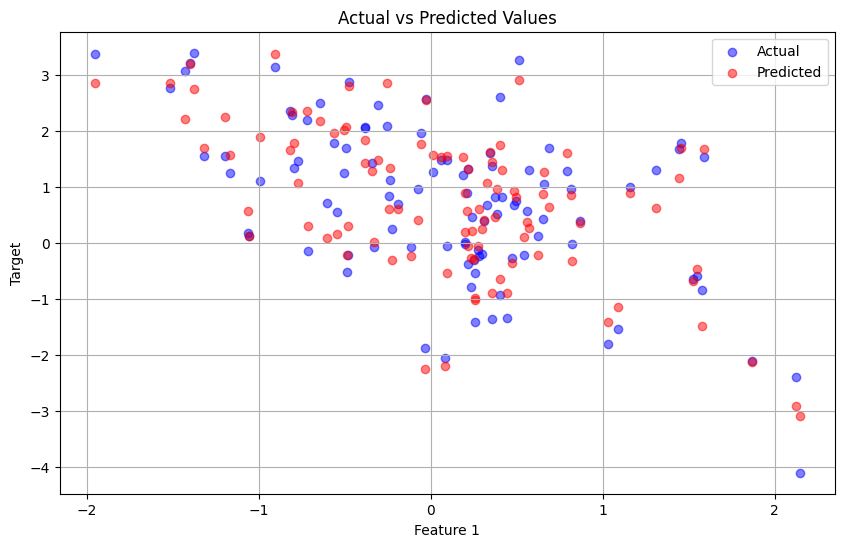

In [7]:
if __name__ == "__main__":
    # Generate sample data
    X, y, true_coefficients, true_intercept = generate_sample_data(n_samples=100, n_features=3, noise=0.5)

    model = MultipleLinearRegression(fit_intercept=True)
    model.fit(X, y)

    # Print results
    print("True parameters:")
    print(f"Intercept: {true_intercept:.4f}")
    print(f"Coefficients: {true_coefficients}")
    print("\nEstimated parameters:")
    print(f"Intercept: {model.intercept:.4f}")
    print(f"Coefficients: {model.coefficients}")

    # Print detailed summary
    model.summary(X, y, ["Feature 1", "Feature 2", "Feature 3"])

    # Visualize results
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], y, color='blue', alpha=0.5, label='Actual')
    plt.scatter(X[:, 0], model.predict(X), color='red', alpha=0.5, label='Predicted')
    plt.xlabel('Feature 1')
    plt.ylabel('Target')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()